In [7]:
import numpy as np  
import matplotlib.pyplot as plt
import glob
import pandas as pd

c:\Users\54115\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\54115\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [56]:
path = 'C:/Users/54115/Desktop/Doctorado/Neuro Cognitiva/RESPUESTAS/'

tanda_primero_im = [14,16,18,20,38]
condic_im_1 = []
condic_num_2 = []

condic_im_2 = []
condic_num_1 = []

archivos = glob.glob(path + '*.csv')
for arch in archivos: 
    condicion = arch.split('_')[1]
    df = pd.read_csv(arch)
    sujeto = list(df['subid'])[0]
    #print(sujeto)
    if sujeto in tanda_primero_im:
        if condicion == 'imagenes':
            condic_im_1.append(np.cumsum(list(df['response_time'].fillna(0))))
        else:
            condic_num_2.append(np.cumsum(list(df['response_time'].fillna(0))))
    else:
        if condicion == 'numeritos':
            condic_num_1.append(np.cumsum(list(df['response_time'].fillna(0))))
        else:
            condic_im_2.append(np.cumsum(list(df['response_time'].fillna(0))))



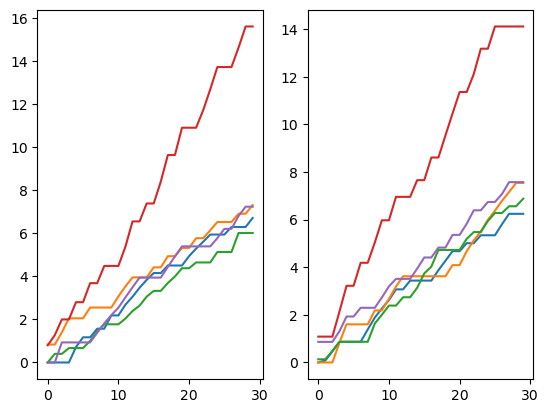

In [57]:
plt.subplot(1,2,1)
for sublista in condic_im_1:
    plt.plot(sublista) 

plt.subplot(1,2,2)
for sublista in condic_num_2:
    plt.plot(sublista) 
plt.show()

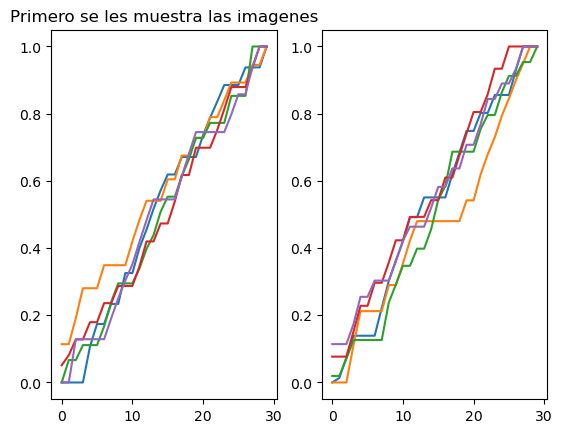

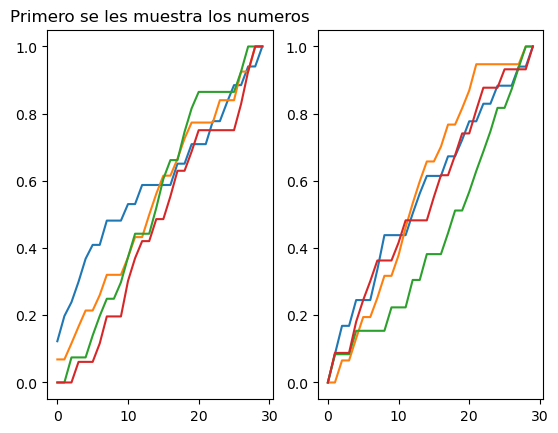

In [58]:
#normalizo las curvas

plt.subplot(1,2,1)
for sublista in condic_im_1:
    plt.plot(sublista/sublista[-1]) 
plt.title('Primero se les muestra las imagenes')
plt.subplot(1,2,2)
for sublista in condic_num_2:
    plt.plot(sublista/sublista[-1]) 
plt.show()


plt.subplot(1,2,1)
for sublista in condic_num_1:
    plt.plot(sublista/sublista[-1]) 
plt.title('Primero se les muestra los numeros')
plt.subplot(1,2,2)
for sublista in condic_im_2:
    plt.plot(sublista/sublista[-1]) 
plt.show()



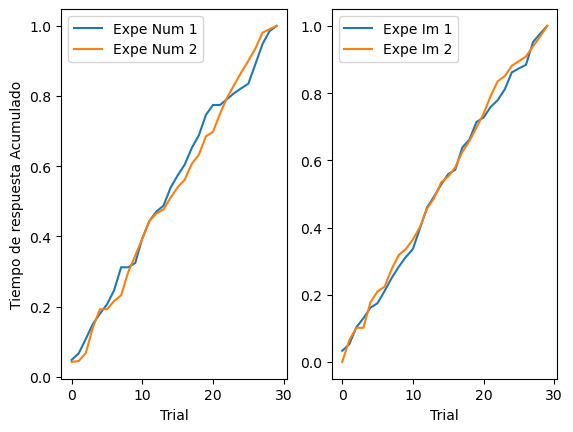

In [61]:
def cum_sum_mean_norm(listas,norm = False):
    norm_lista = []
    for sublista in listas:
        if norm :
            norm_lista.append( [x / sublista[-1] for x in sublista])
        else:
            norm_lista.append( [x for x in sublista])
    return np.mean(norm_lista,axis=0)

norm = True
plt.subplot(1,2,1)
plt.plot(cum_sum_mean_norm(condic_num_1,norm),label = 'Expe Num 1')
plt.plot(cum_sum_mean_norm(condic_num_2,norm),label = 'Expe Num 2')
plt.ylabel('Tiempo de respuesta Acumulado')
plt.xlabel('Trial')
plt.legend()
plt.subplot(1,2,2)
plt.plot(cum_sum_mean_norm(condic_im_1,norm),label = 'Expe Im 1')
plt.plot(cum_sum_mean_norm(condic_im_2,norm),label = 'Expe Im 2')
plt.xlabel('Trial')
plt.legend()
plt.show()

### Nosotres

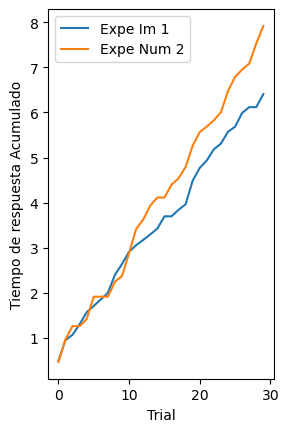

In [67]:
def cum_sum_mean_norm(listas,norm = False):
    norm_lista = []
    for sublista in listas:
        if norm :
            norm_lista.append( [x / sublista[-1] for x in sublista])
        else:
            norm_lista.append( [x for x in sublista])
    return np.mean(norm_lista,axis=0)

path = 'C:/Users/54115/Desktop/Doctorado/Neuro Cognitiva/Nosotres/'

tanda_primero_im = [9,37,96] #lo puse asi para no cambiar todo el codigo de antes
condic_im_1_nosotres = []
condic_num_2_nosotres = []

archivos = glob.glob(path + '*.csv')
for arch in archivos: 
    condicion = arch.split('_')[1]
    df = pd.read_csv(arch)
    sujeto = list(df['subid'])[0]
    #print(sujeto)
    if sujeto in tanda_primero_im:
        if condicion == 'imagenes':
            condic_im_1_nosotres.append(np.cumsum(list(df['response_time'].fillna(0))))
        else:
            condic_num_2_nosotres.append(np.cumsum(list(df['response_time'].fillna(0))))

norm = False
plt.subplot(1,2,1)
plt.plot(cum_sum_mean_norm(condic_im_1_nosotres,norm),label = 'Expe Im 1')
plt.plot(cum_sum_mean_norm(condic_num_2_nosotres,norm),label = 'Expe Num 2')
plt.ylabel('Tiempo de respuesta Acumulado')
plt.xlabel('Trial')
plt.legend()
plt.show()

## Veo la cantidad de Errores

In [71]:
path = 'C:/Users/54115/Desktop/Doctorado/Neuro Cognitiva/RESPUESTAS/'

tanda_primero_im = [14,16,18,20,38]
condic_im_1 = []
correct_im_1 = []
condic_num_2 = []
correct_num_2 = []

condic_im_2 = []
correct_im_2 = []
condic_num_1 = []
correct_num_1 = []

archivos = glob.glob(path + '*.csv')
for arch in archivos: 
    condicion = arch.split('_')[1]
    df = pd.read_csv(arch)
    sujeto = list(df['subid'])[0]
    #print(sujeto)
    if sujeto in tanda_primero_im:
        if condicion == 'imagenes':
            condic_im_1.append(np.cumsum(list(df['response_time'].fillna(0))))
            correct_im_1.append(df['correct'].sum())
        else:
            condic_num_2.append(np.cumsum(list(df['response_time'].fillna(0))))
            correct_num_2.append(df['correct'].sum())
    else:
        if condicion == 'numeritos':
            condic_num_1.append(np.cumsum(list(df['response_time'].fillna(0))))
            correct_num_1.append(df['correct'].sum())
        else:
            condic_im_2.append(np.cumsum(list(df['response_time'].fillna(0))))
            correct_im_2.append(df['correct'].sum())



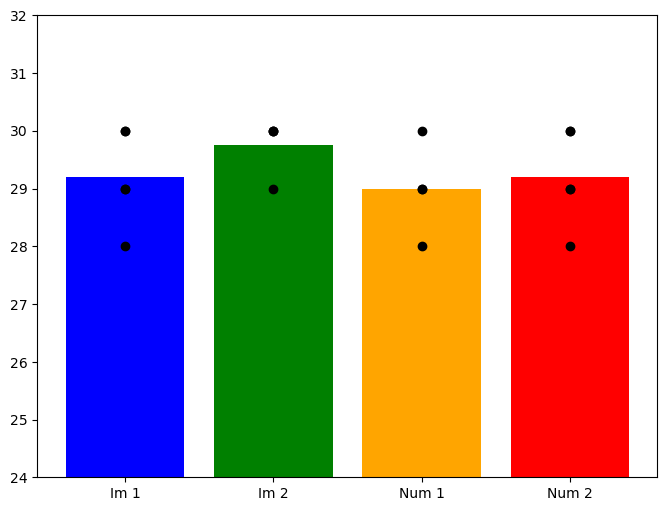

In [86]:
listas = [correct_im_1, correct_im_2, correct_num_1, correct_num_2]

# Queremos calcular el promedio de cada lista
promedios = [sum(lista) / len(lista) for lista in listas]

# Etiquetas para las barras
etiquetas = ['Im 1', 'Im 2', 'Num 1', 'Num 2']

plt.figure(figsize=(8, 6))
barras = plt.bar(etiquetas, promedios, color=['blue', 'green', 'orange', 'red'])

for i, lista in enumerate(listas):
    plt.scatter([i] * len(lista), lista, color='black', zorder=5)  # Puntitos para cada valor

#
plt.ylim(24,32)
plt.show()
